In [ ]:
'''doc file excel ->
    luu vao dataframe->
    luu noi dung tu dataframe vao file .csv
    
    -dataset co 8 cot: 7 cot dau la du lieu dau vao, cot cuoi la dau ra'''
import pandas as pd

dbs = pd.read_excel('Concrete_Data.xlsx', sheet_name=0)

dbs.to_csv('Concrete_Data.csv', index = False, header=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

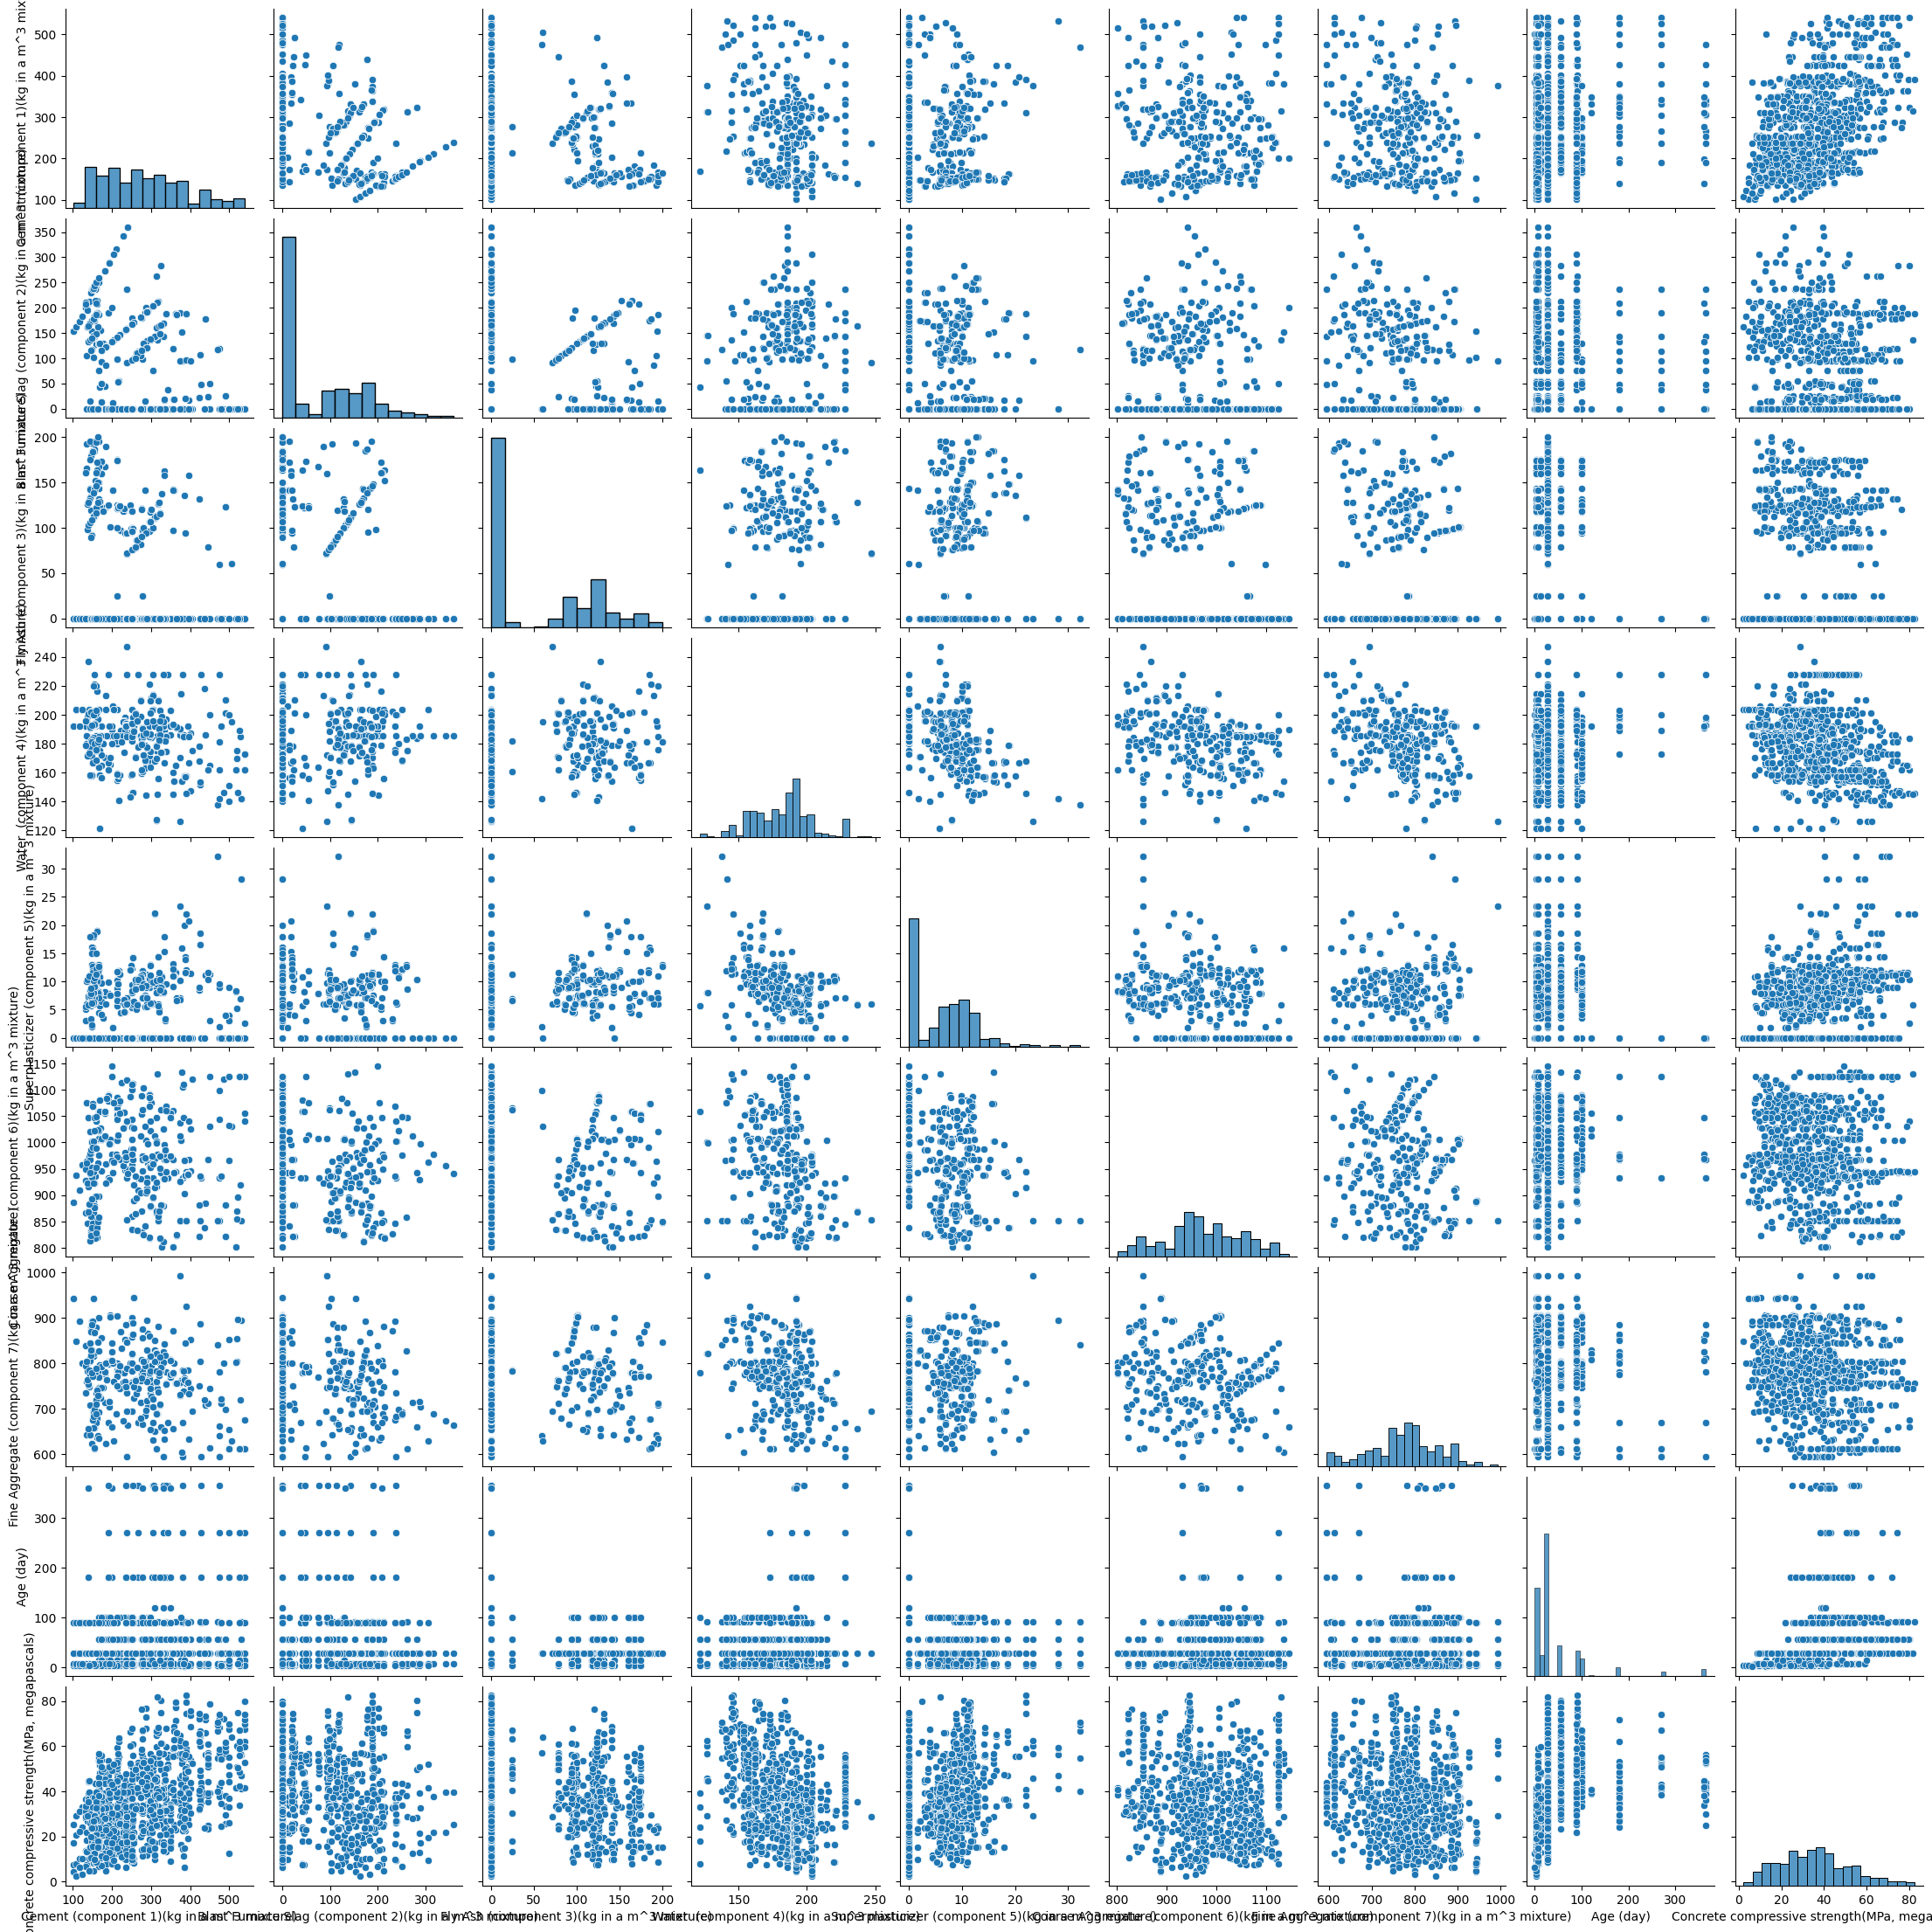

In [13]:
# doc du lieu
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Concrete_Data.csv')
print(df.info()) # hien thi thong tin cua du lieu: kieu du lieu, co cotj nao thieu du lieu hay khong
print(df.describe()) # tinh cac gia tri nhu trung binh, max, min, tu phan vi,....
sns.pairplot(df)
plt.show()


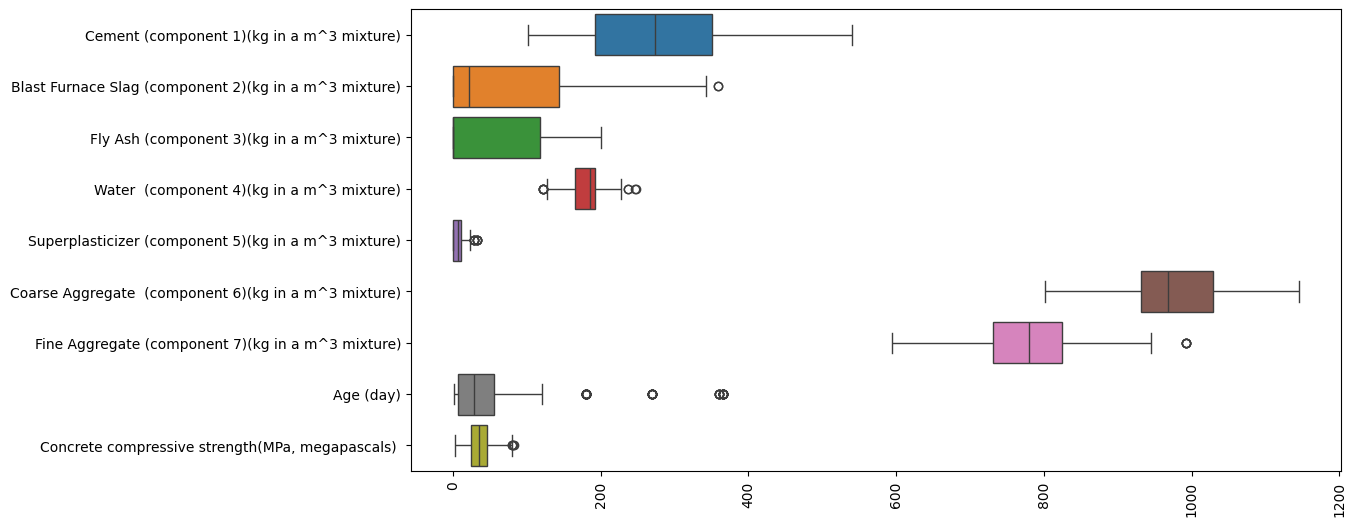

In [14]:
# kiem tra va xu ly du lieu
plt.figure(figsize=(12, 6)) #tao figure moi va datj kich thuoc bang ve(inch)
sns.boxplot(data=df, orient="h") # dung tu phan vi de ve
plt.xticks(rotation=90) # xoay truc X 90 do de tranh lan khi qua nhieu cot
plt.show()

In [16]:
# chuan hoa du lieu
from sklearn.preprocessing import MinMaxScaler
# chia du thanh 2 phan
x = df.iloc[:, :-1] # lay tu cot 0 -> 6 (dau vao)
y = df.iloc[:, -1] #lay cot cuoi cung (dau ra)

# khoi tao minmaxscaler va chuan hoa
scaler = MinMaxScaler() # tao bo nho co khoang scaling mac dinh la [0,1]
x_norm = scaler.fit_transform(x) # ap dung vao cthuc va dua ve khoang tren

# tao dataframe moi va ghep them bien muc tieu
df_norm = pd.DataFrame(x_norm, columns=x.columns) 
df_norm['strength'] = y 
df_norm.to_excel('Concrete_Data_cleaned.xlsx', index=False)


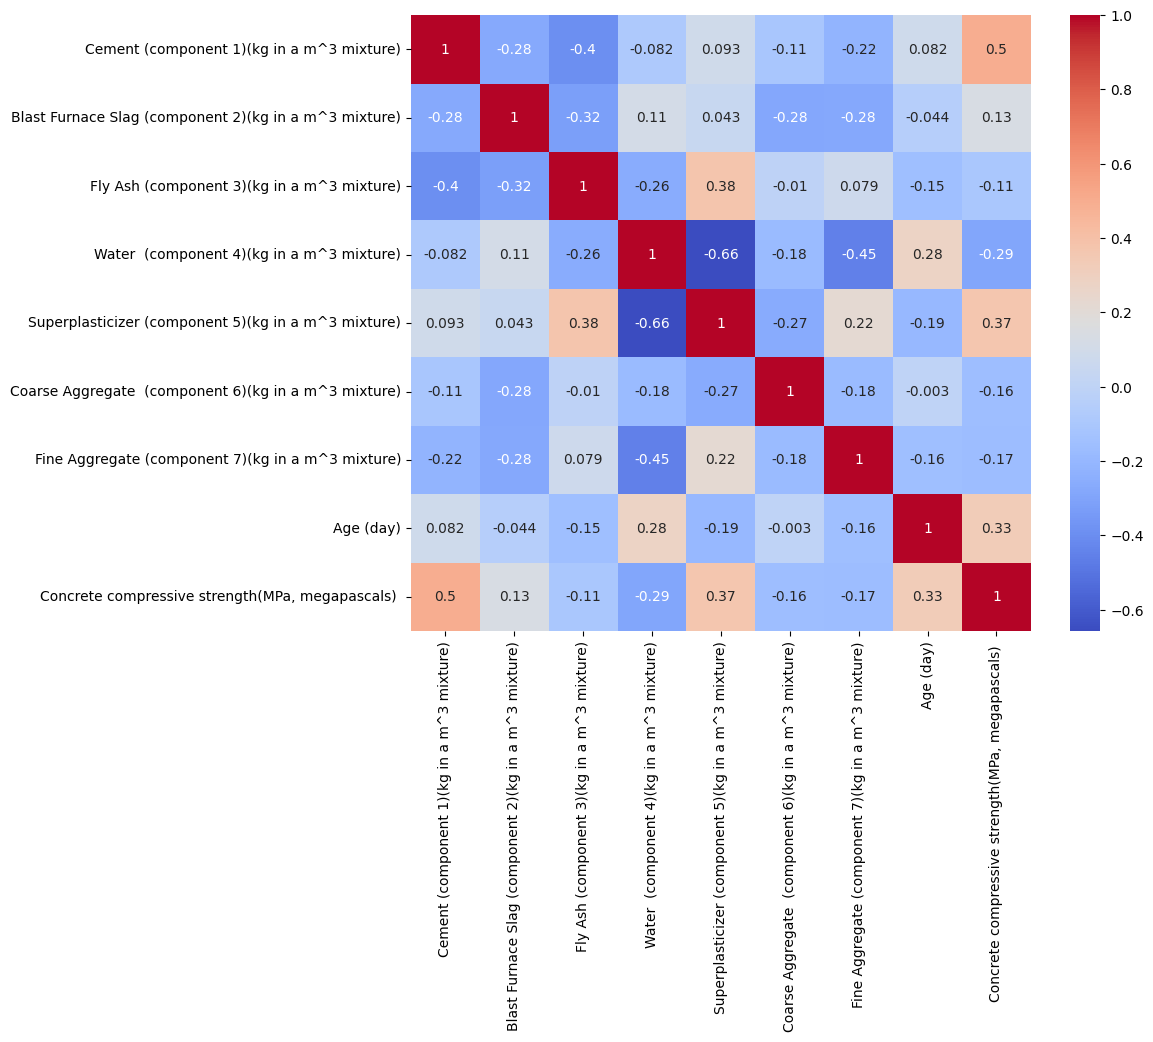

In [17]:
# kham pha do tuong quang
'''ve bieu do heatmap ( df.corr(tao matrix tuong quan),
annot(hien thi gia tri tuong quan ben trong moi o mau), 
cmap(dung bang mau tuong quan))'''

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [18]:
# tach du lieu va chuan bi train, test
from sklearn.model_selection import train_test_split

'''df_norm la dataframe da duoc chuan hoa,
drop('strength') la loai bo cot strength vi no la dau ra(muc tieu)'''
X = df_norm.drop('strength', axis=1)
y = df_norm['strength'] # tao bien muc tieu

# chia du lieu thanh tap huan luyen va kiem tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# khoi tao model hoi quy tuyen tinh co ban
model = LinearRegression()

# su dung du lieu huan luyen de du doan ket qua tot nhat
model.fit(X_train, y_train)

# du doan dau ra dua tren du lieu test
y_pred = model.predict(X_test)

# tinh R² score
r2 = r2_score(y_test, y_pred)

# tinh trung binh binh phuong sai so -> can bac hai
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# In kết quả
print("Do phu hop(R²):", round(r2, 4))
print("Sai so thuc te(RMSE):", round(rmse, 4))

Do phu hop(R²): 0.6275
Sai so thuc te(RMSE): 9.7967
